In [1]:
""" Importing libraries """
from ovito.io import *
from ovito.modifiers import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!ls

annealed_Co-Fe-Ni_5.data	annealing_heating.in
annealed_Co-Fe-Ni.data		annealing_heating.in.run
annealed_system_4.dump		annealing.in
annealed_system_5.dump		annealing.in.init
annealed_system.dump		annealing.in.run
annealed_system_heating.dump	annealing.in.settings
annealing_Co-Fe-Ni_4.log	common-neigh.ipynb
annealing_Co-Fe-Ni_5.log	log.lammps
annealing_Co-Fe-Ni_heating.log	molten_Co-Fe-Ni.data
annealing_Co-Fe-Ni.log		temperature_4.dat
annealing_cooling.in		temperature_5.dat
annealing_cooling.in.run	temperature_heating.dat


In [3]:
""" Loading input file into an Ovito pipeline """
pipeline_wetting = import_file("annealed_system_4.dump")

In [4]:
""" Append modifiers to the pipeline (e.g. CNA, RDF, ...) """
pipeline_wetting.modifiers.append(CommonNeighborAnalysisModifier())
pipeline_wetting.modifiers.append(CoordinationAnalysisModifier(cutoff=10.0,partial=True))

In [5]:
f_bcc_vec = []
f_fcc_vec = []
f_hcp_vec = []
f_amo_vec = []

In [6]:
""" Loop over simulation frames and do something """
n = 0
for data in pipeline_wetting.frames:
    
    n += 1
    print('frame # ',n,'/',pipeline_wetting.num_frames)
    
    n_bcc = data.attributes['CommonNeighborAnalysis.counts.BCC']
    f_bcc = n_bcc / data.particles.count
    f_bcc_vec.append(f_bcc)
    
    n_fcc = data.attributes['CommonNeighborAnalysis.counts.FCC']
    f_fcc = n_fcc / data.particles.count
    f_fcc_vec.append(f_fcc)
    
    n_hcp = data.attributes['CommonNeighborAnalysis.counts.HCP']
    f_hcp = n_hcp / data.particles.count
    f_hcp_vec.append(f_hcp)
    
    f_amo = 1-(f_bcc+f_fcc+f_hcp)
    f_amo_vec.append(f_amo)
    
    if f_amo<0 :
        print("WARNING: negative fraction of amorphous phase!")

frame #  1 / 51
frame #  2 / 51
frame #  3 / 51
frame #  4 / 51
frame #  5 / 51
frame #  6 / 51
frame #  7 / 51
frame #  8 / 51
frame #  9 / 51
frame #  10 / 51
frame #  11 / 51
frame #  12 / 51
frame #  13 / 51
frame #  14 / 51
frame #  15 / 51
frame #  16 / 51
frame #  17 / 51
frame #  18 / 51
frame #  19 / 51
frame #  20 / 51
frame #  21 / 51
frame #  22 / 51
frame #  23 / 51
frame #  24 / 51
frame #  25 / 51
frame #  26 / 51
frame #  27 / 51
frame #  28 / 51
frame #  29 / 51
frame #  30 / 51
frame #  31 / 51
frame #  32 / 51
frame #  33 / 51
frame #  34 / 51
frame #  35 / 51
frame #  36 / 51
frame #  37 / 51
frame #  38 / 51
frame #  39 / 51
frame #  40 / 51
frame #  41 / 51
frame #  42 / 51
frame #  43 / 51
frame #  44 / 51
frame #  45 / 51
frame #  46 / 51
frame #  47 / 51
frame #  48 / 51
frame #  49 / 51
frame #  50 / 51
frame #  51 / 51


In [7]:
dt = 0.1 # [ns]
t = dt*np.arange(pipeline_wetting.num_frames)

<IPython.core.display.Javascript object>


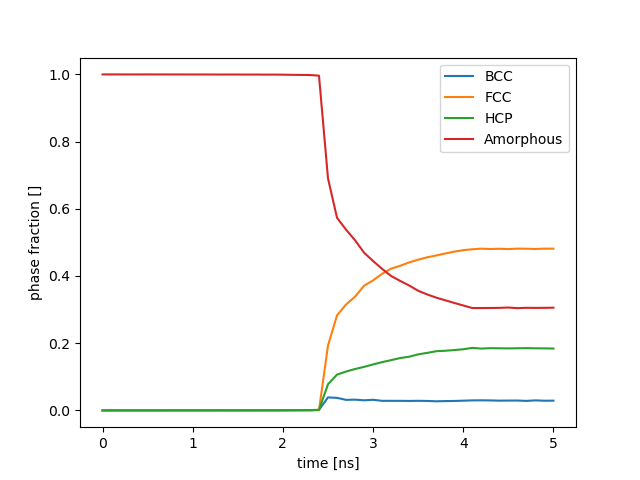

In [8]:
%matplotlib notebook
plt.plot(t,f_bcc_vec,label='BCC')
plt.plot(t,f_fcc_vec,label='FCC')
plt.plot(t,f_hcp_vec,label='HCP')
plt.plot(t,f_amo_vec,label='Amorphous')
plt.xlabel('time [ns]')
plt.ylabel('phase fraction []')
plt.legend()
plt.show()